<a href="https://colab.research.google.com/github/pratik4511/Lab/blob/main/Module_4_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PHASE - 1 Installing suitable libraries.**

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark
     

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
     

In [2]:
from pyspark import SparkContext                                    
from pyspark.sql import SparkSession, Window, Row                   
from pyspark.sql import functions as F                              
from pyspark.sql.functions import col, isnan, when, count           
from pyspark.sql.functions import *                                 
from pyspark.sql.types import *          

In [6]:
import matplotlib.pyplot as plt                                     # Popular plotting library
%matplotlib inline                                                  
import seaborn as sns                                               # Advanced plotting library


In [8]:
# Building a spark app/session
spark = SparkSession.builder.appName("CarsSpark").getOrCreate()

# single cluster information
spark

## **PHASE - 2 Dataset & Description.**

In [12]:
# Fetching the data

from google.colab import files
files.upload()

Saving car_data.csv to car_data.csv


{'car_data.csv': b'Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner\r\nritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0\r\nsx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0\r\nciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0\r\nwagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0\r\nswift,2014,4.6,6.87,42450,Diesel,Dealer,Manual,0\r\nvitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0\r\nciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0\r\ns cross,2015,6.5,8.61,33429,Diesel,Dealer,Manual,0\r\nciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0\r\nciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0\r\nalto 800,2017,2.85,3.6,2135,Petrol,Dealer,Manual,0\r\nciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual,0\r\nciaz,2015,7.5,9.94,15000,Petrol,Dealer,Automatic,0\r\nertiga,2015,6.1,7.71,26000,Petrol,Dealer,Manual,0\r\ndzire,2009,2.25,7.21,77427,Petrol,Dealer,Manual,0\r\nertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0\r\nertiga,2015,7.25,10.79,41678,Die

In [15]:
CarData = spark.read.csv('car_data.csv',inferSchema=True, header=True)


In [17]:
# Shape of the dataset.
print(" Shape : ",
      CarData.count(),
      len(CarData.columns))

# Head 10 observations 
CarData.show(10)

 Shape :  301 9
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2015|         6.75|         8.12|     18796|   Petrol|     D

In [19]:
# Data Description
CarData.describe().show()

# Dataframe schema 
CarData.printSchema()

+-------+--------+------------------+-----------------+-----------------+-----------------+---------+-----------+------------+-------------------+
|summary|Car_Name|              Year|    Selling_Price|    Present_Price|       Kms_Driven|Fuel_Type|Seller_Type|Transmission|              Owner|
+-------+--------+------------------+-----------------+-----------------+-----------------+---------+-----------+------------+-------------------+
|  count|     301|               301|              301|              301|              301|      301|        301|         301|                301|
|   mean|   800.0|2013.6279069767443|4.661295681063127|7.628471760797344|36947.20598006644|     null|       null|        null|0.04318936877076412|
| stddev|     NaN|2.8915541273367253|5.082811556177805|8.644115402015789|38886.88388206789|     null|       null|        null| 0.2479148926949198|
|    min|     800|              2003|              0.1|             0.32|              500|      CNG|     Dealer|   Au

# **PHASE - 3 Exploratory Data Analysis**

In [21]:
# Helper library to plot graphs
!pip install handyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 46 kB/s 
     |████████████████████████████████| 199 kB 48.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=4a28e7853345366bccaa236e7def82cbb2c3e557ea7544693b009ae0d961cf18
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [22]:
from handyspark import *  

In [24]:
# Converting to handyspark CarData
hdf = CarData.toHandy()
hdf.show()

+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2015|         6.75|         8.12|     18796|   Petrol|     Dealer|      Manu

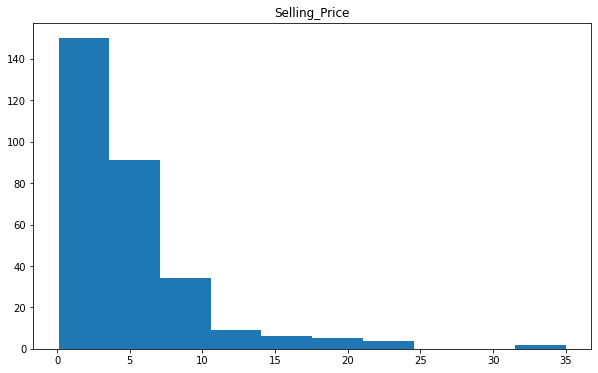

In [30]:
from matplotlib.patches import colors

# EDA-1, Distribution of selling_price of car.
fig, ax = plt.subplots(
    figsize=(10, 6))
hdf.cols['Selling_Price'].hist(ax=ax)
plt.show()

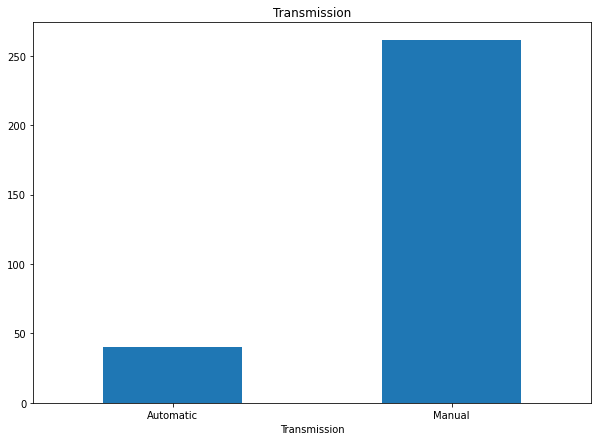

In [34]:
# EDA-2, Car transmission mode.

fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols['Transmission'].hist(ax=ax)
plt.show()

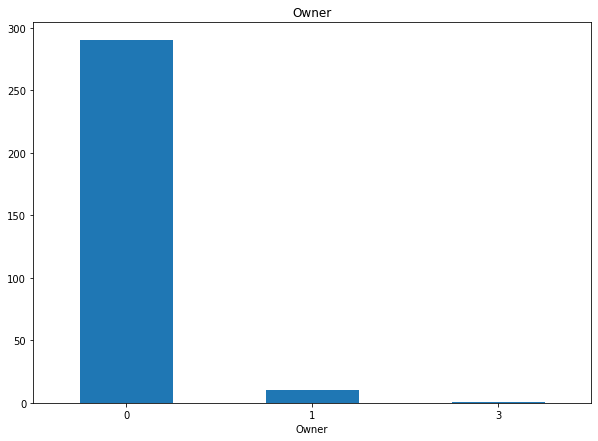

In [36]:
# EDA-3, Car Ownership

fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols['Owner'].hist(ax=ax)
plt.show()

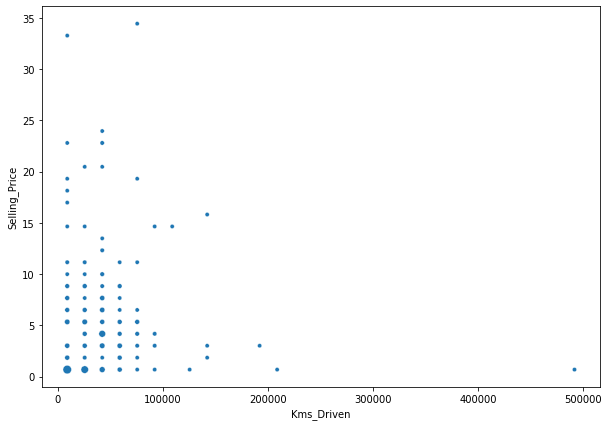

In [43]:
# EDA - 4, Is there any relation between selling_price and km_driven variable? 

fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols[['Kms_Driven', 'Selling_Price']].scatterplot(ax=ax)
plt.show()

No linear raltion found between selling price and km_driven variable.

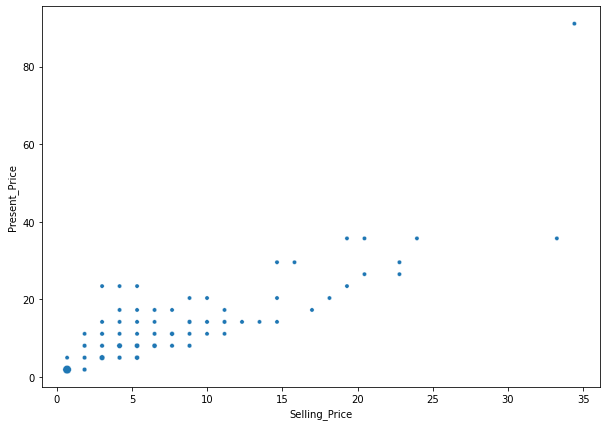

In [44]:
# EDA - 5, Is there any relation between selling_price and present price variable? 

fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols[['Selling_Price','Present_Price']].scatterplot(ax=ax)
plt.show()

There is slight relationship between present price and selling price.

In [49]:
# EDA 6, Does car trasmission affects selling_price?

hdf.stratify(['Transmission']).cols['Selling_Price'].mean()

Transmission
Automatic    9.420000
Manual       3.931992
Name: Selling_Price, dtype: float64


Mean value for Manual Transmission cars is 3.9 lacs and it is 9.4 lacs for Automatic.



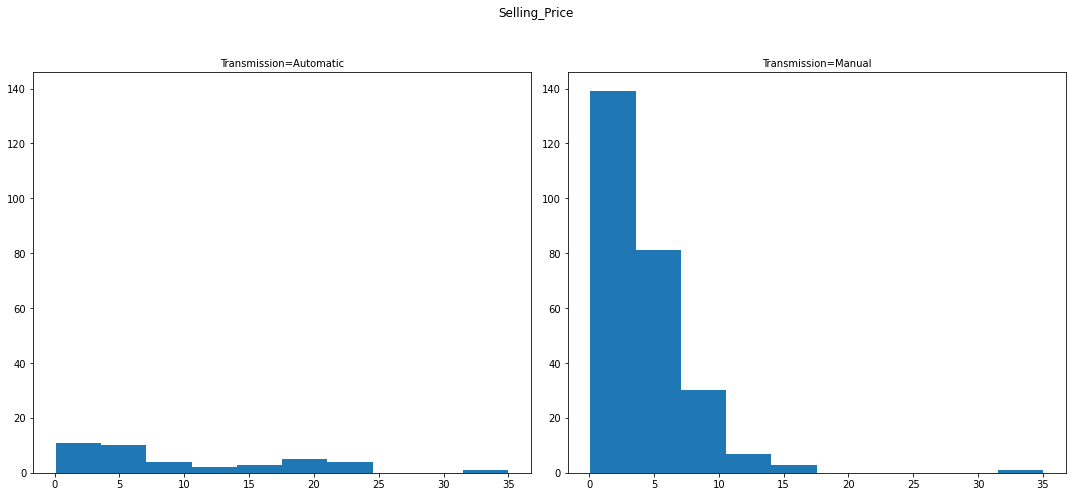

In [50]:
hdf.stratify(['Transmission']).cols['Selling_Price'].hist(figsize=(15,7))
plt.show()